<br>

<b><font size=22>Machine learning and statistical learning</font></b>
### (K-Nearest Neighbors)

**<font color = red>NGUYEN Thi Huong</font>**

**<font color = red>MASTER 2 EBDS</font>**

## 1. Context
In this exercise, you will build a classifier using the K-Nearest Neighbors algorithm.

## 2. Lab setup: generating data

In a first step, you will generate data. To do so:
### 1. Draw n = 50 observations in a unit square. To do so:

• randomly generate 50 observations from a Beta distribution with parameters α = β = 1 and store the drawn values in an object you will call x.

• Do the same procedure and store the draws in an object you will call y.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
np.random.seed(123)
x = np.random.beta(1, 1, size = 50)
y = np.random.beta(1, 1, size = 50)

In [4]:
x

array([0.7087962 , 0.29152056, 0.55086446, 0.88022503, 0.50983392,
       0.61314719, 0.31763509, 0.17516902, 0.46602537, 0.57693427,
       0.84366837, 0.43338398, 0.1273839 , 0.52986858, 0.9101117 ,
       0.25332992, 0.09756236, 0.02641702, 0.77791018, 0.18038005,
       0.58768512, 0.89129013, 0.43355352, 0.27477532, 0.41220433,
       0.44724218, 0.32736746, 0.47207612, 0.3800845 , 0.00271239,
       0.35998716, 0.31334921, 0.81945811, 0.67681143, 0.45135864,
       0.23918427, 0.93854188, 0.17523667, 0.48319315, 0.8565742 ,
       0.86948787, 0.90473082, 0.37139736, 0.48486792, 0.82140197,
       0.01328466, 0.22308274, 0.04407522, 0.04143993, 0.79525637])

In [5]:
y

array([0.89042779, 0.12789929, 0.93087491, 0.46109265, 0.36112866,
       0.48003683, 0.86886863, 0.71671022, 0.95393004, 0.01130666,
       0.1736089 , 0.31958745, 0.08640259, 0.88156928, 0.63622229,
       0.31203866, 0.32149015, 0.43703145, 0.01598992, 0.76718578,
       0.67083178, 0.96020248, 0.98216398, 0.14042158, 0.06063628,
       0.17201736, 0.02222478, 0.08359477, 0.40239262, 0.71588602,
       0.41603702, 0.00729161, 0.11352046, 0.02810755, 0.48976635,
       0.6038995 , 0.35467233, 0.57055532, 0.50696344, 0.63295131,
       0.28055427, 0.611766  , 0.62343082, 0.74687897, 0.75851332,
       0.62570307, 0.23758442, 0.79512636, 0.77113359, 0.9911493 ])

### 2. Create a vector you will call true_label of size n = 50 which will contain the true labels: “orange” or “blue”
• “orange” if x + y ≥ 1

• “blue” otherwise.

In [6]:
true_label = np.where((x + y) >= 1, "orange", "blue")

### 3. Create a new point ($x_0, y_0$) at which you will try to assign a label, depending on the values of the nearest neighbors. For example: ($x_0 = 0.75, y_0 = 0.5$). 

In [7]:
x0 = 0.75
y0 = 0.5

### 4. Create a matrix with 3 columns: the x and y coordinates of your generated points, and the assigned label.

In [8]:
matrix = np.array([x, y, true_label])
matrix

array([['0.7087962001482243', '0.2915205607261141', '0.5508644649938116',
        '0.8802250282254706', '0.5098339187183689', '0.6131471890845918',
        '0.31763509101815507', '0.17516901712177893',
        '0.4660253746874307', '0.5769342725676896', '0.8436683687538818',
        '0.43338398296132963', '0.1273839022883489', '0.529868575774588',
        '0.9101116972695052', '0.2533299177414687',
        '0.09756236312671537', '0.026417023719911423',
        '0.7779101768817878', '0.1803800462018237', '0.5876851181488675',
        '0.8912901339305496', '0.43355351771102546',
        '0.27477531508023056', '0.41220432592794365',
        '0.44724218098609664', '0.3273674565822664',
        '0.4720761233937692', '0.380084503251582',
        '0.002712385220183117', '0.3599871619390577',
        '0.3133492118892728', '0.8194581071705033', '0.6768114266946713',
        '0.45135863583385943', '0.23918427359707473',
        '0.9385418753660365', '0.17523667424495792',
        '0.483193151366

In [9]:
df = pd.DataFrame({"x":x, "y":y, "True_label":true_label})

In [10]:
df

,x,y,True_label
0,0.708796,0.890428,orange
1,0.291521,0.127899,blue
2,0.550864,0.930875,orange
3,0.880225,0.461093,orange
4,0.509834,0.361129,blue
5,0.613147,0.480037,orange
6,0.317635,0.868869,orange
7,0.175169,0.716710,blue
8,0.466025,0.953930,orange
9,0.576934,0.011307,blue


### 5. Plot your 50 observations on a scatter plot and add the new $(x_0, y_0)$ observation using a different color/shape.

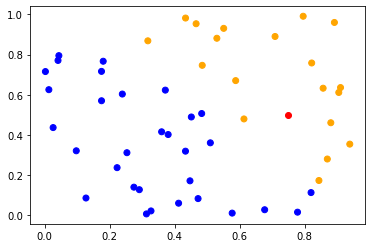

In [11]:
plt.scatter(df.x, df.y, c= df.True_label) #plot our observation in 2 diffrence color 
plt.scatter(x0, y0, color = "red") #add the new point

## 3 The algorithm

### 1. To know which are the K closests points of your new observation, you need to compute the distance between each point of your dataset and your new observation. To that end, create a function that computes the distances between two points:

In [12]:
def distance(xA, yA, xB, yB): 
    df["distance"] = ((xA - xB) ** 2 + (yA - yB) ** 2) ** 0.5
    return df


### 2. Using a loop, apply this function to your new point (x0, y0) and each of the points in your dataset. In other words, at iteration i, store the Euclidean distance between your point (x0, y0) and the i-th point from your data, i.e., (xi , yi). Once you have computed the distance from your point (x0, y0) to all points from your dataset, order your dataset by increasing distances to your new point.

In [13]:
distance(x0, y0, df.x, df.y)

,x,y,True_label,distance
0,0.708796,0.890428,orange,0.392596
1,0.291521,0.127899,blue,0.590476
2,0.550864,0.930875,orange,0.474666
3,0.880225,0.461093,orange,0.135913
4,0.509834,0.361129,blue,0.277426
5,0.613147,0.480037,orange,0.138301
6,0.317635,0.868869,orange,0.568334
7,0.175169,0.716710,blue,0.614324
8,0.466025,0.953930,orange,0.535438
9,0.576934,0.011307,blue,0.518433


Now, I make an order of my dataset by increasing distances to my new point

In [14]:
df = df.sort_values('distance', ascending = True, ignore_index= True)

### 3. Pick a value for K. For example, K = 3.

In [15]:
K = 9

### 4. In a new object, copy the K first rows of your dataset that was previously ordered by ascending values of the distance to the new point: this allows you to keep the K nearest neighbors.

In [16]:
df2 = df.loc[0:K-1, :]

In [17]:
df2

,x,y,True_label,distance
0,0.880225,0.461093,orange,0.135913
1,0.613147,0.480037,orange,0.138301
2,0.856574,0.632951,orange,0.170394
3,0.904731,0.611766,orange,0.190875
4,0.910112,0.636222,orange,0.210220
5,0.587685,0.670832,orange,0.235647
6,0.938542,0.354672,orange,0.238051
7,0.869488,0.280554,orange,0.249868
8,0.483193,0.506963,blue,0.266898


### 5. Plot the points of this dataset in a different color.

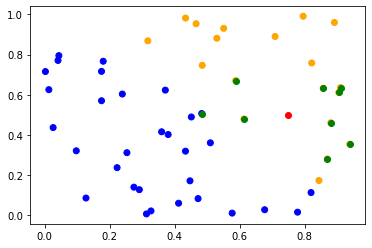

In [18]:
plt.scatter(df.x, df.y, c= df.True_label) #plot our observation in 2 diffrence color 
plt.scatter(df2.x, df2.y, c= 'green')  #plot the 9 nearest neighbors of new point as green color
plt.scatter(x0, y0, color = "red") #add new point 

In this grapth, when we set the green color for the group of 3 nearest point of the new point (x0, y0), we can the this sub - group is inside of orange group, so it means probably, the new point is an orange point

### 6. Based on that dataset with only the K nearest neighbors, compute the number of "blue" and the number of "orange", then provide an estimation of the probability for the new observation to be blue.

In [19]:
#Number of orange
orange = len(df2.loc[df2.True_label == "orange"])
orange


8

In [20]:
#probability for new observation to be orange 
proba_orange = orange/len(df2.index)
proba_orange

0.8888888888888888

In [21]:
#number of blue
len(df2.loc[df2.True_label == "blue"])

1

In [22]:
#probability for new observation to be blue
proba_blue = 1 - proba_orange
proba_blue

0.11111111111111116

### 7. Based on that probability, assign a predicted class to your new observation.

We can see that from K = 9 points closest to the new point, and 8 points were in orange color, one in blue. Therefore we have the output for new point should belong to class orange color with probability is 88.88%

### 8. Set a different value for K and look at how it may change your prediction.

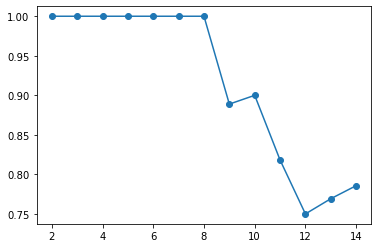

In [23]:
list_proba = []
for K in range(2,15):
    df2 = df.loc[0:K-1, :]
    proba_orange = len(df2.loc[df2.True_label == "orange"])/len(df2.index)
    list_proba.append(proba_orange)
plt.plot(range(2,15), list_proba, 'o-')
plt.show()
#The probability of new point will be orange by increasing the number of K 

This graph illustrates that The probability of new point will be an orange point was decreased as a function of increasing of K. Because K indices the number of nearest neighbors for the new point, when we increase the distance between the new point with their neighbors, the probability to be an orange point will be decreased. Therefore, K has an important role that effects KNN performance. 